# Teknisk Tirsdag: Unsupervised Learning

Tillykke du er i anden uge af din ansættelse i den norske virksomhed, som operere med data science. Din leder var meget tilfreds med analysen fra sidste uge. Vedkommende mener at vi skal begynde kigge lidt bredere på spillere.

Vores kunder interesseret i at undersøge hvordan forholdet imellem spillernes placeringer på banen er i forhold til deres fysiske egenskaber. I og med det gik så godt i sidste uge har vi fået ansvaret for at lave en analyse der viser dette.


Opgaver
====

0. Diskutere hvorfor vi kan bruge clustering til at gruppere spillere.
1. Isolere de kolonner som vi ønsker at basere analysen på.
2. Første kørsel med KMeans, leg med antal af cluster
3. Kør den forbedret version af problemet og med hyperparameterne optimering.
4. Noget med at fortolke hvilke spillere der er outliers i deres spiller-gruppe... Kig på outliers, og brug forskellige outlier metrikker.

In [1]:
#PURE PYTHON!!!!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import cluster

### Import af sidste uges notebook til dagens øvelse
Der er ingen grund til at lave dobbeltarbejde.

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:2850: DtypeWarning: Columns (23,35) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


Kolonnenavn: Name                 antal fyldte felter: 17981     datatype: object
Kolonnenavn: Age                  antal fyldte felter: 17981     datatype: int64
Kolonnenavn: Nationality          antal fyldte felter: 17981     datatype: object
Kolonnenavn: Overall              antal fyldte felter: 17981     datatype: int64
Kolonnenavn: Potential            antal fyldte felter: 17981     datatype: int64
Kolonnenavn: Club                 antal fyldte felter: 17733     datatype: object
Kolonnenavn: Value                antal fyldte felter: 17981     datatype: object
Kolonnenavn: Wage                 antal fyldte felter: 17981     datatype: object
Kolonnenavn: Special              antal fyldte felter: 17981     datatype: int64
Kolonnenavn: Acceleration         antal fyldte felter: 17981     datatype: object
Kolonnenavn: Aggression           antal fyldte felter: 17981     datatype: object
Kolonnenavn: Agility              antal fyldte felter: 17981     datatype: object
Kolonnenavn: Balance

Teknisk Tirsdag - Data Cleaning.ipynb:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  "cell_type": "markdown",
Teknisk Tirsdag - Data Cleaning.ipynb:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  {
Teknisk Tirsdag - Data Cleaning.ipynb:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  "cells": [


Variablenavn: Name                 Variabletype: object
Variablenavn: Age                  Variabletype: int64
Variablenavn: Nationality          Variabletype: object
Variablenavn: Overall              Variabletype: int64
Variablenavn: Potential            Variabletype: int64
Variablenavn: Club                 Variabletype: object
Variablenavn: Value                Variabletype: float64
Variablenavn: Wage                 Variabletype: float64
Variablenavn: Special              Variabletype: int64
Variablenavn: Acceleration         Variabletype: float64
Variablenavn: Aggression           Variabletype: float64
Variablenavn: Agility              Variabletype: float64
Variablenavn: Balance              Variabletype: float64
Variablenavn: Ball control         Variabletype: float64
Variablenavn: Composure            Variabletype: float64
Variablenavn: Crossing             Variabletype: float64
Variablenavn: Curve                Variabletype: float64
Variablenavn: Dribbling            Variabl

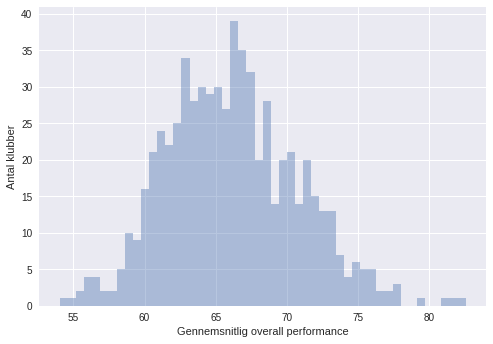

Træningsæt størrelse: 1272


In [2]:
# Run the datacleaning notebook to get all the variables
%run 'Teknisk Tirsdag - Data Cleaning.ipynb'

### Opgave 0: Hvorfor giver det mening at bruge clustering?
Diskutere med andre, i 5 min, om hvorfor det kan være en god idé, at bruge clustering til at vise spillerpositioner. Hvilken viden kan vi få ud af det? Kan der være problemer med denne analyse og hvorfor?
Kom gerne med eksempler på om vi kan overføre denne tankegang til det virkelige verden.

__Vi tager en kort gennemgang af denne opgave, inden vi forsætter med resten.__

### Opgave 1: Find vores feature kolonner.

Som data scientist er det uundgåeligt, ikke at skulle få beskidte fingre og arbejde med noget kode.
I denne øvelse vil vi bruge nogle af Python's funktioner til finde hhv. det indeks hvor de fysiske attributter starter og slutter.
*Bare rolig: Hvis alt andet fejler, kan vi også tælle os frem til løsningen :-)*


__Lidt om Pandas dataframes__

Et pandas dataframe har en attribut som indeholder en liste af kolonner. Man tilgår attributten som på mange andre kodesprog ved at bruge punktum efter objektes navn fx.
    x.attribut.

1. Først skal to fysiske egenskaber findes; heldigvis ligger alle de fysiske egenskaber rækkefølge. Disse to markerer hhv. den første og den sidste kolonne, som indeholder fysiske egenskaber.

2. Vores næste opgave er at indeksere elementerne i den udtrukket liste. Der er mange veje til målet, dette er nok den [nemmeste](https://stackoverflow.com/questions/10777271/python-using-enumerate-inside-list-comprehension)
 
3. Nu skal resultatet fra den første og anden opgave kombineres. Udtræk indekset for hhv. start og slut kolonnen.


__Tip:__
Som i mange Objekt Orienteret Sporg findes der mange veje til målet. Dine bedste redskaber til at komme til målet er: Din sunde fornuft og [Google](https://www.google.dk)...

Hvert element i vores liste tager formen: (indeks, kolonne_med_første_fysisk_egenskab), hvis vi kalder et element i listen for *x*, kan indeks f.eks. tilgås ved x[0].
Et godt sted at starte er at bruge filter [*filter*](http://book.pythontips.com/en/latest/map_filter.html) metoden. 

In [3]:
# Vi bruger alle spillere i FIFAs katelog.
attribute_df = df.copy()
position_df = attribute_df[['Name','Preferred Positions', 'Age', 'Nationality']]

In [4]:
attribute_df = attribute_df.set_index(['Name']);
position_df = position_df.set_index('Name');

In [5]:
attribute_df.head()

,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Acceleration,Aggression,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
Name,,,,,,,,,,,,,,,,,,,,,
Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,95500000.0,565000.0,2228,89.0,63.0,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
L. Messi,30,Argentina,93,93,FC Barcelona,105000000.0,565000.0,2154,92.0,48.0,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
Neymar,25,Brazil,92,94,Paris Saint-Germain,123000000.0,280000.0,2100,94.0,56.0,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
L. Suárez,30,Uruguay,92,92,FC Barcelona,97000000.0,510000.0,2291,88.0,78.0,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
M. Neuer,31,Germany,92,92,FC Bayern Munich,61000000.0,230000.0,1493,58.0,29.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
position_df.head()

,Preferred Positions,Age,Nationality
Name,,,
Cristiano Ronaldo,ST LW,32,Portugal
L. Messi,RW,30,Argentina
Neymar,LW,25,Brazil
L. Suárez,ST,30,Uruguay
M. Neuer,GK,31,Germany


In [7]:
enumareted_cols = list(enumerate(attribute_df.columns)) ###INDSÆT KODE

In [8]:
attribute_start_col = list(filter(lambda x: x[1]=='Acceleration', enumareted_cols))[0][0] ###INDSÆT KODE
print(attribute_start_col)

8


In [9]:
attribute_end_col = list(filter(lambda x: x[1]=='Volleys',enumareted_cols))[0][0] ###INDSÆT KODE
print(attribute_end_col)

41


In [10]:
# Vi ordner resten for dig.
attribute_col = list(range(attribute_start_col, attribute_end_col+1, 1))

In [11]:
attribute_df = attribute_df.iloc[:,attribute_col]

#### Bekræft at vi har kolonnerne med

In [12]:
print((list(attribute_df.columns))) ###INDSÆT KODE TIL AT BEKRÆFTE

['Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control', 'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing', 'Free kick accuracy', 'GK diving', 'GK handling', 'GK kicking', 'GK positioning', 'GK reflexes', 'Heading accuracy', 'Interceptions', 'Jumping', 'Long passing', 'Long shots', 'Marking', 'Penalties', 'Positioning', 'Reactions', 'Short passing', 'Shot power', 'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle', 'Strength', 'Vision', 'Volleys']


In [13]:
attribute_df.head()

,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,...,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys
Name,,,,,,,,,,,,,,,,,,,,,
Cristiano Ronaldo,89.0,63.0,89.0,63.0,93.0,95.0,85.0,81.0,91.0,94.0,...,96.0,83.0,94.0,23.0,91.0,92.0,31.0,80.0,85.0,88.0
L. Messi,92.0,48.0,90.0,95.0,95.0,96.0,77.0,89.0,97.0,95.0,...,95.0,88.0,85.0,26.0,87.0,73.0,28.0,59.0,90.0,85.0
Neymar,94.0,56.0,96.0,82.0,95.0,92.0,75.0,81.0,96.0,89.0,...,88.0,81.0,80.0,33.0,90.0,78.0,24.0,53.0,80.0,83.0
L. Suárez,88.0,78.0,86.0,60.0,91.0,83.0,77.0,86.0,86.0,94.0,...,93.0,83.0,87.0,38.0,77.0,89.0,45.0,80.0,84.0,88.0
M. Neuer,58.0,29.0,52.0,35.0,48.0,70.0,15.0,14.0,30.0,13.0,...,85.0,55.0,25.0,11.0,61.0,44.0,10.0,83.0,70.0,11.0


#### Indledende statistik
For bedre at kunne forstå vores datasæt, giver det god menning at danne sig et overblik over data. Dette gøres ved *describe()* metoden, som laver opsummerende statistik på alle numeriske kolonner.

In [14]:
attribute_df.describe()

,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,...,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys
count,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,...,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000
mean,64.600578,55.822257,63.342417,63.815528,58.109838,57.896057,49.781380,47.311996,55.067238,45.299538,...,61.904844,58.302931,55.661031,45.572048,64.832212,63.261109,47.446026,65.291363,53.022635,43.227852
std,14.907052,17.468440,14.791361,14.094377,16.799127,12.926942,18.459139,18.461347,18.991248,19.475738,...,9.171952,14.922538,17.398559,21.484684,14.637391,15.922908,21.834465,12.617383,14.387463,17.735041
min,11.000000,11.000000,14.000000,11.000000,8.000000,5.000000,5.000000,6.000000,2.000000,2.000000,...,28.000000,10.000000,3.000000,4.000000,11.000000,12.000000,4.000000,12.000000,10.000000,4.000000
25%,56.000000,43.000000,55.000000,56.000000,53.000000,51.000000,38.000000,34.000000,48.000000,29.000000,...,55.000000,53.000000,46.000000,24.000000,57.000000,56.000000,26.000000,58.000000,43.000000,30.000000
50%,67.000000,59.000000,65.000000,66.000000,63.000000,60.000000,54.000000,48.000000,61.000000,48.000000,...,62.000000,62.000000,59.000000,52.000000,67.000000,66.000000,54.000000,66.000000,55.000000,44.000000
75%,75.000000,69.000000,74.000000,74.000000,69.000000,67.000000,64.000000,62.000000,68.000000,61.000000,...,68.000000,68.000000,69.000000,64.000000,75.000000,74.000000,66.000000,74.000000,64.000000,57.000000
max,96.000000,96.000000,96.000000,96.000000,95.000000,96.000000,91.000000,92.000000,97.000000,95.000000,...,96.000000,92.000000,94.000000,91.000000,96.000000,95.000000,92.000000,98.000000,94.000000,91.000000


#### Opgave 1 forsat:
Brug 5 minutter på at diskutere hvad denne statistik betyder. Kan vi få noget vigtigt ud af denne tabel?

#### Fortrukne positioner
I vores datasæt findes der også fortrukne positioner. Dem har vi trukket ud til *postition_df*, som vises under denne celle.

In [15]:
position_df.loc[:,'position_list'] = np.array(position_df['Preferred Positions'].str.split(' ').tolist())

In [16]:
position_df.head()

,Preferred Positions,Age,Nationality,position_list
Name,,,,
Cristiano Ronaldo,ST LW,32,Portugal,"[ST, LW, ]"
L. Messi,RW,30,Argentina,"[RW, ]"
Neymar,LW,25,Brazil,"[LW, ]"
L. Suárez,ST,30,Uruguay,"[ST, ]"
M. Neuer,GK,31,Germany,"[GK, ]"


###  Opgave 2: Første kørsel med KMeans

Da alt databearbejdningen fandt sted i sidste uge, er der blot tilbage, at kører den egentlig analyse. Til dette har vi [KMeans](https://en.wikipedia.org/wiki/K-means_clustering). 
Denne algoritme bruger et afstandsmål som reference til at skabe grupperinger. Ud fra afstandsmålne kan vi skabe nogle cluster centre, *centriods*. 

- Din første opgave er at køre KMeans. Vælg et passende antal cluster, grupper, du synes kunne være relevant, som data skal deles i - man må gerne diskutere med andre om valg af antal clustre.

Inden vi kommer så vidt, er vi nødt til at omforme positionerne således de kan sammenlignes med det resultat vi får fra vores Kmeans-algoritme.

In [19]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
labels = mlb.fit(position_df['position_list'])

In [20]:
real_position_list = [i for i in labels.classes_ if i != '']
position_df[labels.classes_] = pd.DataFrame(labels.transform(position_df['position_list']), index=position_df.index, columns=labels.classes_)
del position_df['']
del position_df['position_list']
position_df.head()

Kør selve KMeans

In [59]:
n_clusters = None### INDSÆT ANTAL CLUSTRE
kmeans = cluster.KMeans(n_clusters= 20, random_state= True)
position_df['prediction'] = kmeans.fit_predict(attribute_df)

In [60]:
grouped_by_position_df = position_df.groupby('prediction', as_index=True)[real_position_list].sum()

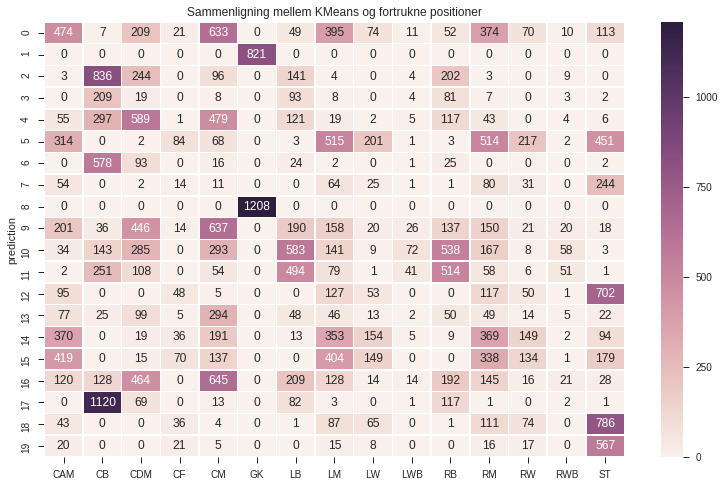

In [61]:
f, ax = plt.subplots(figsize=(13, 8))
sb.set(style="ticks")
sb.heatmap(grouped_by_position_df, annot=True, fmt="d", linewidths=.5, ax=ax)
plt.title('Sammenligning mellem KMeans og fortrukne positioner')
plt.show()

Ovenstående figur viser fordelingen imellem hvad KMeans grupperet spillerne som (predictions opad y-aksen), i forhold til deres fortrukne spiller (positioner ud af x-aksen). 

Her er et billedet over positionerne. Diskutere hvad tallene i tabellen betyder. Giver dette resultat mening?
<img src="https://www.fifauteam.com/wp-content/uploads/2015/10/A768-1.jpg"
         align="center"
         width="100%">

Slå 3 tegns bogstaver sammen til 2.

### Opgave 3: 
Første forsøg med at køre KMeans var ikke så sucessfuldt som håbet. 
Nogle af de fejlkilder som er i eksempler er at Flere spillere har mange fortrukne positioner; mange af disse positioner er tæt på hinanden f.eks. LWB og LB.

Generelt ses det at vi har variationer i positioner ved disse 3-bogstavskombinationer.
En anden fejlkilde er at vi tager rådata ind, hvilket kan ødelægge vores analyse. Normalt fortages der en [standardisering](https://en.wikipedia.org/wiki/Feature_scaling) af ens data. 


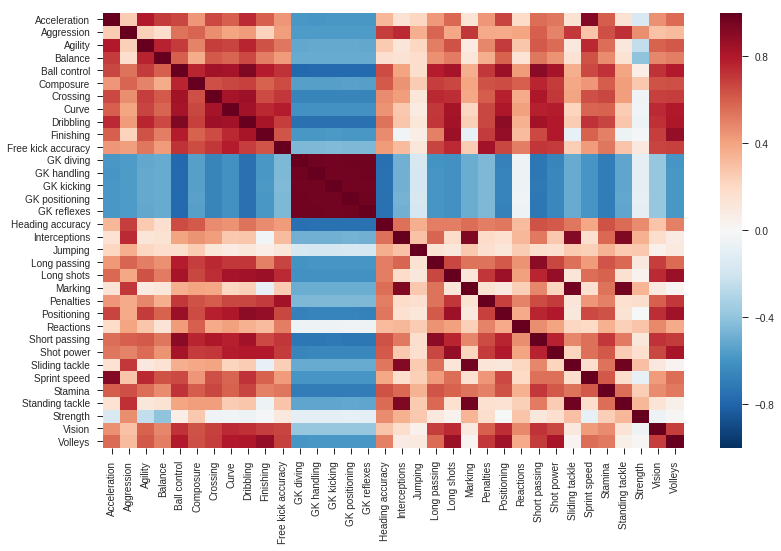

In [85]:
f, ax = plt.subplots(figsize=(13, 8))
sb.set(style="ticks")
sb.heatmap(attribute_df.corr())
plt.show()

Index(['Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control',
       'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing',
       'Free kick accuracy', 'GK diving', 'GK handling', 'GK kicking',
       'GK positioning', 'GK reflexes', 'Heading accuracy', 'Interceptions',
       'Jumping', 'Long passing', 'Long shots', 'Marking', 'Penalties',
       'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys'],
      dtype='object')